<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">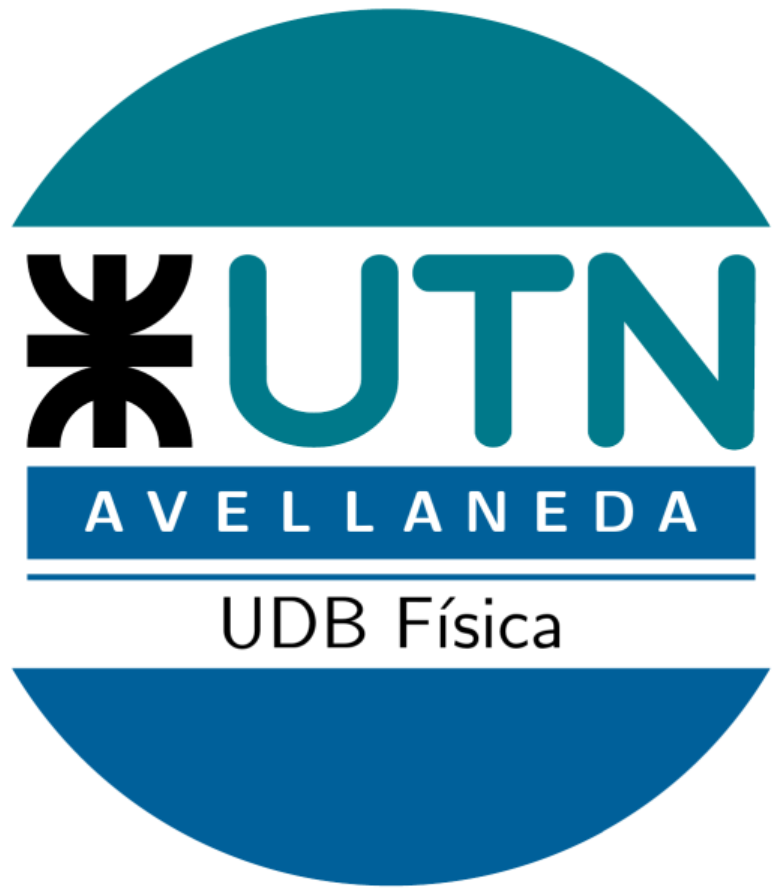</a></td><td style="border:none;"><font face="times" size=4>Física 2<br>2025<br>Electromagnetismo<br>Material de referencia</font></td></tr>
</table> 

</br>

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">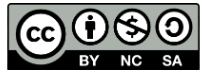</a></td><td style="border:none;"><font face="times" size=4>2025 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font></td></tr>
</table>

# Distribuciones de carga continuas

---

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Campo y potencial eléctrico de distribuciones de carga contínuas consideradas como sistemas de muchas cargas infinitesimales](#toc1_)    
- 2. [Segmento de línea](#toc2_)    
  - 2.1. [Con carga uniforme](#toc2_1_)    
  - 2.2. [Segmento muy largo (línea infinita) con carga uniforme](#toc2_2_)    
  - 2.3. [Segmento con carga no uniforme](#toc2_3_)    
  - 2.4. [Más de un segmento](#toc2_4_)    
- 3. [Anillo cargado uniformemente](#toc3_)    
- 4. [Anillo con carga no uniforme](#toc4_)    
- 5. [Referencias](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, cos, sin, pi
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
%precision %.3f

!pip install --index-url https://test.pypi.org/simple/ --no-deps --upgrade frautnEM
from frautnEM.puntuales import Ef, V, plotEfVector, equipotencialesPuntuales
from frautnEM.puntuales import plotEf, plotEfvector3d
from frautnEM.clases import plotEfVectorHilo

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
%matplotlib widget

## 1. <a id='toc1_'></a>[Campo y potencial eléctrico de distribuciones de carga contínuas consideradas como sistemas de muchas cargas infinitesimales](#toc0_)

Para comenzar el estudio de distribuciones contínuas, consideremos una línea con carga total $Q$. Podemos pensar dicha línea está formada por $N$ partículas de carga $q_i$ de forma que:
$$
Q = \sum_{i=1}^N q_i ~ . \tag{1}
$$

El campo eléctrico producido por cada carga $q_i$ ubicada en la posición $\vec{\text{x}}_i$ a lo largo de la línea, puede escribirse como:
$$
\vec{E}_i(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \frac{q_i}{|\vec{\text{r}}_i|^3} \vec{\text{r}}_i\, , \tag{2}
$$

donde
* $q_i$ es la carga eléctrica de la partícula i-ésima 
* $\vec{\text{r}}_i$ es el vector diferencia entre la posición donde se quiere obtener el vector de campo eléctrico ($\vec{\text{x}}$) y la posición de la partícula cargada ($\vec{\text{x}}_i$), es decir: 
$$
\vec{\text{r}}_i = (x-x_i)\hat{i} + (y-y_i)\hat{j} + (z-z_i)\hat{k} ~ . \tag{3}
$$

En la siguiente figura se muestran a modo de ejemplo los vectores correspondientes a la primera ($q_1$) y a la última ($q_N$) cargas a lo largo de una línea curvada. 

<div style="text-align: center;">
       <image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/modulos/img/em02_linea.svg">
</div>

Por último, para obtener el campo total es necesario sumar los vectores de los campos de todas las $q_i$ a lo largo de la línea:
$$
\vec{E}(\vec{\text{x}}) = \sum_{i=1}^N \vec{E}_i(\vec{\text{x}})  ~ . \tag{4}
$$

Este procedimiento se puede extender a sumar cargas distribuidas sobre una superficie o cargas distribuidas en un volumen, para los casos de superficies o volúmenes cargados.

## 2. <a id='toc2_'></a>[Segmento de línea](#toc0_)
### 2.1. <a id='toc2_1_'></a>[Con carga uniforme](#toc0_)

Consideremos un segmento de longitud $L = 20 \text{ cm}$, ubicado sobre el eje $x$ centrado en el origen, y con carga total $Q = 1\text{ nC}$ distribuida uniformemente.  

<div style="text-align: center;">
       <image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/modulos/img/em03_segmento.svg" height="280">
</div>

El resultado exacto para el módulo del campo eléctrico en el punto $P$ mostrado en la figura se puede calcular con la siguiente fórmula [[1]](#segmento):

$$
|\vec{E}(\vec{\text{x}}_P)| = \frac{2kQ}{a} \frac{1}{\sqrt{L^2 + 4a^2}}\ . \tag{5}
$$

Calculemos el módulo del campo si la distancia del punto sobre el eje de simetría es $a = 5\text{ cm}$, usando la fórmula 5:

In [ ]:
k = 9E9
Q = 1E-9
L = 0.2
a = 0.05

(2*k*Q/a)*(1/sqrt(L**2 + 4*a**2))

# El resultado está expresado en N/C.

Ahora aproximemos al segmento como si fueran 5 cargas puntuales, cada una con carga $q_i = Q/5$, y calculemos el campo usando nuestra función E(x, y, z, Q).
 
<div style="text-align: center;">
       <image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/modulos/img/em03_segmento-partido.svg" height="75">
</div>


In [ ]:
# El valor de cada carga es Q/N.
q = 1E-9/5

Q = [
    [q,-0.08,0,0],
    [q,-0.04,0,0],
    [q,    0,0,0],
    [q, 0.04,0,0],
    [q, 0.08,0,0],
]

Ef(0,0.05,0,Q)

Nuestra aproximación es bastante buena. Lo que estamos calculando es la contribución de cada porción del segmento en el cálculo del campo total en el punto $P$, es decir, la suma de los siguientes vectores:

In [ ]:
X = [[-0.07, 0.05, 0]]

plotEfVector(Q, X, scale=5E3, limites=[-0.3,0.3,-0.2,0.4], contribuciones = True, conectores=True, aumento=10)

Si queremos mejorar nuestra aproximación, necesitamos partir al segmento en más cargas. El nuevo desafío es escribir la configuración de cargas cuando son muchas. A continuación utilizamos un ciclo para generar la cantidad de cargas que consideremos necesaria. (¿Cuántas son suficientes?)

In [ ]:
# Carga total del objeto:
Qtotal = 1E-9

# Longitud del segmento (en m):
L = 20E-2

# Número de cargas en que se divide el cuerpo extenso:
N = 50

# Valor de cada carga puntual.
dq = Qtotal/N

# Separación entre cargas:
dx = L/N

# Valor inicial de x (el centro del primer "diferencial" de longitud dx):
x0 = -L/2 + dx/2

Q = []
for i in range(N):
    Q = Q + [[dq, x0+i*dx,0,0]]

Ef(0,0.05,0,Q)


El nuevo cálculo se acerca más al resultado exacto. Grafiquemos algunos vectores de campo eléctrico para verificar visualmente que está funcionando bien.

In [ ]:
X = [[0,0.1,0],[0,-0.1,0],[-0.2,0,0],[0.2,0,0],[-0.1,0.1,0],[0.1,0.1,0],[-0.1,-0.1,0],[0.1,-0.1,0]]
plotEfVector(Q, X, limites=[-0.3,0.3,-0.3,0.3], title="Segmento con carga uniforme", 
    scale=5E3, aumento=10)

In [ ]:
V(0,0.1,0,Q)

In [ ]:
plotEf(Q, dx=0.25, title="Líneas de campo: Segmento")

Y las líneas de campo y equipotenciales del segmento.

In [ ]:
levels = [30, 40, 60, 80, 100]

equipotencialesPuntuales(Q, niveles=levels, dim=0.3)

El valor del potencial en diferentes puntos:

In [ ]:
V(0,0.1,0,Q), V(0,0.14,0,Q), V(0.2,0.1,0,Q)

Recordar que esas curvas son las intersecciones del plano $xy$ con las superficies equipotenciales. Por ejemplo, el potencial a diferente altura desde el centro, en $z=0.1\,\text{m}$, nos debería dar lo mismo que en $y=0.1\,\text{m}$:

In [ ]:
V(0,0,0.1,Q)

Comprobamos que las líneas de campo son perpendiculares a esas curvas:

In [ ]:
equipotencialesPuntuales(Q, niveles=levels, EF=True, dim=0.3)

### 2.2. <a id='toc2_2_'></a>[Segmento muy largo (línea infinita) con carga uniforme](#toc0_)

El cálculo análitico para obtener el campo eléctrico producido por una línea recta de carga infinita es mucho más sencillo que el correspondiente a un segmento de longitud finita. Es por ello que se aprovecha el resultado analítico de la línea infinita para aproximar el campo de un segmento en regiones donde se lo puede considerar muy largo, cerca del centro del segmento.

El campo producido por un hilo infinito con densidad de carga uniforme se puede calcular con la siguiente fórmula [[2]](#hiloinfinito):

$$
    \vec{E}(r) = \frac{2k\lambda}{r} \hat{r} ~ , \tag{6}
$$

donde
* $r$ es la distancia entre el punto donde se calcula el campo y la línea cargada
* $\hat{r}$ es la dirección radial respecto de la línea de carga
* $\lambda$ es la densidad lineal de carga

A continuación definimos una función que realiza el cálculo utilizando la fórmula 6 para una línea infinita sobre el eje $x$.

In [ ]:
def Ehilo(x, y, z, Lambda):
    """Calcula las componentes del campo eléctrico en N/C para un hilo
    infinito ubicado sobre el eje i, con densidad de carga Lambda.
    Ingresar valores de x,y,z en m y Lambda en C/m.
    """
    k = 9E9   #Constante de Coulomb en las unidades correspondientes.

    # Módulo de r al cuadrado:
    r2 = y**2+z**2

    Ej = 2 * k * Lambda * y / r2
    Ek = 2 * k * Lambda * z / r2

    return 0, Ej, Ek

Verifiquemos que para un hilo con densidad $\lambda = 1\text{ nC/m}$ se obtiene lo esperado calculando $E$ en distintos $r$ y distintos ángulos:

In [ ]:
Lambda = 1E-9

# A 20 cm de distancia

Ehilo(0,0.2,0, Lambda)

In [ ]:
# En otras posiciones

print("E(0,0.1,0) = ", np.round( Ehilo(0, 0.1,   0, Lambda)  ,3))
print("E(1,0.1,0) = ", np.round( Ehilo(1, 0.1,   0, Lambda)  ,3))

print("E(0,0.2,0) = ", np.round( Ehilo(0, 0.2,   0, Lambda)  ,3))
print("E(0,-0.2,0) = ", np.round( Ehilo(0, -0.2,   0, Lambda)  ,3))
print("E(0,0,0.2) = ", np.round( Ehilo(0,   0, 0.2, Lambda)  ,3))
# 20cm a 45 grados en y-z:
print("E(0,0.2/1.4142,0.2/1.4142) = ", np.round( Ehilo(0,0.2/1.4142,0.2/1.4142, Lambda) ,5))

La fórmula 6 es muy fácil de usar pero los hilos infinitos no existen. Usemos nuestro cálculo del campo de un segmento, sumando cargas pequeñas, para analizar el error que se comete cuando aproximamos un segmento por una línea infinita. Para el mismo problema que se resolvió en la sección 2.1, vamos a calcular el campo a distintas distancias $y$ del centro y a diferentes posiciones $x$ a la misma distancia del segmento, y comparar los resultados de usar la fórmula del hilo infinito y el cálculo sumando muchas cargas pequeñas (que asumimos como muy buena aproximación).


<div style="text-align: center;">
       <image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/modulos/img/em03_segmento-aproximacion.svg" width="500">
</div>

Volvemos a considerar un segmento de longitud $L = 20 \text{ cm}$, ubicado sobre el eje $x$ centrado en el origen, y con carga total $Q = 1\text{ nC}$ distribuida uniformemente. Su densidad lineal de carga es $\lambda = 5\text{ nC/m}$.


In [ ]:
# Lista de cargas puntuales que conforman el segmento.

# Carga total del objeto:
Qtotal = 1E-9
# Longitud del segmento (en m):
L = 20E-2
# Número de cargas en que se divide el cuerpo extenso:
N = 50
# Valor de cada carga puntual.
dq = Qtotal/N
# Separación entre cargas:
dx = L/N
# Valor inicial de x (el centro del primer "diferencial" de longitud dx):
x0 = -L/2 + dx/2

Q = []
for i in range(N):
    Q = Q + [[dq, x0+i*dx,0,0]]

# Densidad lineal de carga del segmento
Lambda = Qtotal/L

print("Lambda = ", Lambda, "C/m")


Cálculo a distintas distancias del centro:

In [ ]:
# Lista de posiciones donde se calculará el campo E.
y = np.linspace(0.01, 0.2, num=50)
x = 0
z = 0

# Ciclo para calcular E usando las dos funciones en cada valor de y.
EjInfinito = []
EjPuntuales = []
for yi in y:
    Ei, Ej, Ek = Ehilo(x,yi,z,Lambda)
    EjInfinito.append(Ej)
    Ei, Ej, Ek = Ef(x,yi,z,Q)
    EjPuntuales.append(Ej)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), layout='constrained')
ax.plot(y, EjInfinito, label='Aproximación de hilo infinito')
ax.plot(y, EjPuntuales, label='Segmento')
ax.set_xlabel('Distancia al centro del segmento [m]')
ax.set_ylabel('|E| [N/C]')
ax.set_title("Campo E de un segmento sobre el eje transversal")
ax.legend()

Cálculo en diferentes valores de $x$ a la misma distancia del segmento:

In [ ]:
# Lista de posiciones donde se calculará el campo E.
y = 0.01
X = [[-0.1,y,0],[-0.08,y,0],[-0.05,y,0],[-0.02,y,0],[0.02,y,0],[0.05,y,0],[0.08,y,0],[0.1,y,0]]

plotEfVectorHilo(Ehilo, Ef, Lambda, Q, X, limites=[-0.15, 0.15, -0.005, 0.1], scale=30)

### 2.3. <a id='toc2_3_'></a>[Segmento con carga no uniforme](#toc0_)

Continuemos con el segmento de longitud $L = 20\text{ cm}$ sobre el eje $x$, pero ahora con una densidad lineal de carga:
$$
\lambda = ax+b \, ,
$$
siendo $a = 20\text{ nC/m}^2$ y $b = -1\text{ nC/m}$.

In [ ]:
# Definimos una función para la densidad de carga:
def densidad(x):
    a = 25
    b = -1
    return a*x+b 

# Longitud del segmento (en m):
L = 20E-2

# Número de cargas en que se divide el cuerpo extenso:
N = 50

# Separación entre cargas:
dx = L/N

# Valor inicial de x (el centro del primer "diferencial" de longitud dx):
x0 = -L/2 + dx/2

Q = []
for i in range(N):
    # El valor de cada carga es lambda*dx
    xi = x0+i*dx
    dq = densidad(xi)
    Q = Q + [[dq, xi,0,0]]



In [ ]:
plotEf(Q, dx=0.3, density=1, title='Segmento con densidad no uniforme', figsize=(6,6))

### 2.4. <a id='toc2_4_'></a>[Más de un segmento](#toc0_)

In [ ]:
# Lista de cargas puntuales que conforman el segmento.

# Carga total del objeto:
Qtotal1 = 1E-9
# Longitud del segmento (en m):
L1 = 20E-2
# Número de cargas en que se divide el cuerpo extenso:
N1 = 50
# Valor de cada carga puntual.
dq1 = Qtotal1/N1
# Separación entre cargas:
dx1 = L1/N1
# Valor inicial de x (el centro del primer "diferencial" de longitud dx):
x01 = -L1/2 + dx1/2

Q = []
for i in range(N1):
    Q = Q + [[dq1, x01+i*dx1,0,0]]

# Otro segmento
Qtotal2 = -2E-9
L2 = 20E-2
N2 = 50
dq2 = Qtotal2/N2
dx2 = L2/N2
x02 = -L2/2 + 0.05 + dx2/2

for i in range(N2):
    Q = Q + [[dq2, x02+i*dx2,0.05,0]]


In [ ]:
plotEf(Q, dx=0.3, density=1, title='Líneas de campo de dos segmentos',
          figsize=(6,6))

## 3. <a id='toc3_'></a>[Anillo cargado uniformemente](#toc0_)

Anillo de radio $R = 20\text{ cm}$ sobre el plano $ij$ (es decir, $z=0$), centrado en el origen, con carga total $Q = 1\text{ nC}$ distribuida uniformemente.

In [ ]:
# Carga total del objeto:
Qtotal = 1E-9
# Radio del anillo (en m):
R = 20E-2
# Número de cargas en que se divide el cuerpo extenso:
N = 100

dq = Qtotal/N
# Separación angular entre cargas:
dt = 2*pi/N
# Angulo de la primer carga (el centro del primer "diferencial" de longitud dx=R*dt):
t0 = dt/2

Q = []
for i in np.arange(N):
    Q = Q + [[dq, R*cos(t0+i*dt), R*sin(t0+i*dt),0]]


Algunos vectores de ejemplo:

In [ ]:
X = [[0,0.15,0], [0.2,0.2,0], [0.1, -0.1,0], [-0.2,-0.2,0], [-0.1,-0.1,0]]
plotEfVector(Q, X, limites=[-0.3,0.3,-0.3,0.3], title="Anillo con carga uniforme", 
    scale=3E3, aumento=10)

En el origen:

In [ ]:
Ef(0,0,0,Q)

Fuera del plano, sobre el eje:

In [ ]:
Ef(0,0,0.2,Q)

Fuera del plano, en cualquier lado:

In [ ]:
Ef(0.2,0,0.2,Q)

El potencial en el origen:

In [ ]:
V(0,0,0,Q)

Líneas de campo:

In [ ]:
plotEf(Q, dx=0.3, density=0.75, title='Líneas de campo de un\n anillo con carga uniforme')

In [ ]:
# Para ver las líneas sobre el plano $ik$ usando la misma función, hacemos trampa y
# escribimos el anillo en el plano $ik$ y graficamos la líneas
# en el plano $ij$.

Qr = []
for i in np.arange(N):
    Qr = Qr + [[dq, R*cos(t0+i*dt), 0, R*sin(t0+i*dt)]]

plotEf(Qr, dx=0.3, density=0.5, title='Líneas de campo de un\n anillo con carga uniforme',
          figsize=(6,6))


In [ ]:
plotEfvector3d(Q, dx=0.4, w=6, figsize=(8,8))

## 4. <a id='toc4_'></a>[Anillo con carga no uniforme](#toc0_)

Trabajemos nuevamente con un anillo de radio $R = 20\text{ cm}$ sobre el plano $ij$, pero ahora la densidad de carga está dada por la siguiente función:
$$
\lambda = a\cos(2\theta) \, ,
$$
donde $a = 1\text{ nC/m}$ y $\theta$ es el ángulo respecto del eje $i$ positivo.

In [ ]:
# Definimos una función para la densidad:
def Lambda(t):
    a = 1E-9
    return a*cos(2*t)

# Radio del anillo en m:
R = 20E-2
# Número de cargas en que se divide el cuerpo extenso:
N = 1000

# Separación angular entre cargas:
dt = 2*pi/N
# Angulo de la primer carga (el centro del primer "diferencial" de longitud dx=R*dt):
t0 = dt/2

Q = []
# Longitud de arco para cada segmento de anillo.
ds = R*dt
for i in np.arange(N):
    t = t0 + i*dt
    # Carga de un pequeño arco de anillo: dq= lambda*longitud de arco
    dqi = Lambda(t)*ds
    Q = Q + [[dqi, R*cos(t0+i*dt), R*sin(t0+i*dt),0]]

In [ ]:
plotEf(Q, dx=0.3, density=0.75, title='Líneas de campo de un\n anillo con carga no uniforme')

Campo en el origen:

In [ ]:
Ef(0,0,0,Q)

Potencial en el origen:

In [ ]:
V(0,0,0,Q)

Líneas campo sobre otro plano:

In [ ]:
# Para ver las líneas sobre el plano $ik$ usando la misma función, hacemos trampa y
# escribimos el anillo en el plano $ik$ y graficamos la líneas
# en el plano $ij$.

Qr = []
for i in np.arange(N):
    t = t0 + i*dt
    # Carga de un pequeño arco de anillo: dq= lambda*longitud de arco
    dqi = Lambda(t)*ds
    Qr = Qr + [[dqi, R*cos(t0+i*dt), 0, R*sin(t0+i*dt)]]

plotEf(Qr, dx=0.5, density=0.75, title='Líneas de campo de un\n anillo con carga no uniforme',
          figsize=(6,6))


In [ ]:
# # La figura en 3D puede demorar mucho tiempo dependiendo de la cantidad de cargas que se utilicen.
# R = 20E-2
# N = 100
# dt = 2*pi/N
# t0 = dt/2
# Q = []
# ds = R*dt
# for i in np.arange(N):
#     t = t0 + i*dt
#     dqi = Lambda(t)*ds
#     Q = Q + [[dqi, R*cos(t0+i*dt), R*sin(t0+i*dt),0]]

# plotEfvector3d(E, Q, dx=0.3, w=5, figsize=(6,6))

## 5. <a id='toc5_'></a>[Referencias](#toc0_)

Young, Hugh D. y Freedman, Roger A., $\emph{Física universitaria con física moderna - volumen 2}$, 13ra ed. (Pearson, México, 2013)  
<a id='segmento'>[1]</a> Ejemplo 21.10: Campo de una línea de carga, pág. 706  
<a id='hiloinfinito'>[2]</a> Ejemplo 21.10: Campo de una línea de carga, págs. 706-707  

In [ ]:
# Si se abrieron muchas figuras, con el siguiente comando se puede liberar memoria.

# plt.close('all')    